# Assignment 01
## Normalizing Continuous Features

Consider data drawn from a 2 dimensional normal distribution. 
Normalize the data by first subtracting the mean from each dimension and then dividing the result by its respective standard deviation. 

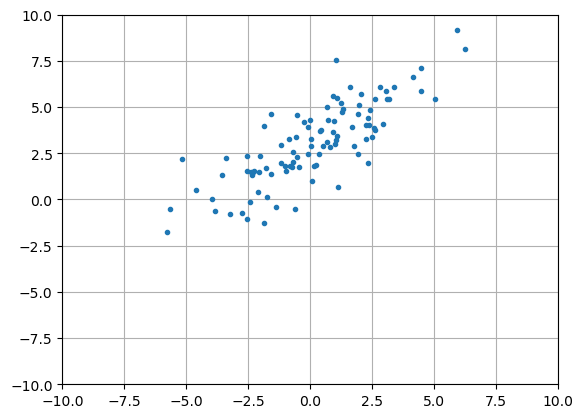

In [185]:
# You don't need to modify this cell

import matplotlib.pylab as plt
import numpy as np
from numpy.random import multivariate_normal as mvn
%matplotlib inline

# Generates some toy data
mu = np.array([0,3])
C = np.array([[5.,4.],[4.,5.]])
X = mvn(mu,C,100)

# Plot the data
plt.plot(X[:,0], X[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)
plt.show()

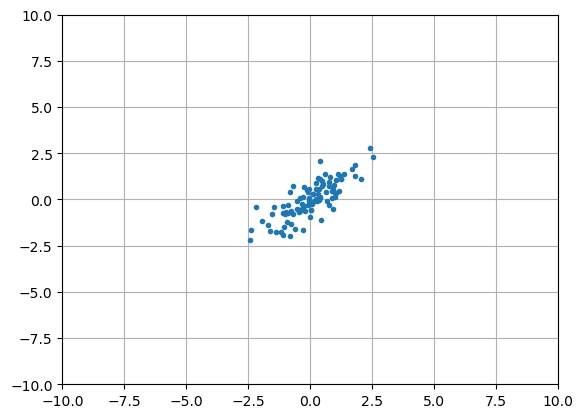

In [186]:
# Normalize the data
mu = np.mean(X, axis=0) # X = mvn(mu,C,100) from previous code
stdev = np.std(X, axis=0)
Xnormalized = (X - mu) / stdev

plt.plot(Xnormalized[:,0], Xnormalized[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)
plt.show()

# Assignment 02

## One-Hot Encoding

Consider the data set ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

Write a function ``one_hot_encoding`` that takes a list of strings like the above and returns an $m \times n$ numpy array, where $m$ is the number of samples and $n$ the number of unique items. Each row corresponds to the one-hot-encoded version of the respective data point in the original list. Don't forget the docstrings!

*Note*: The output of your solution should be the same as the one from ``sklearn``'s ``OneHotEncoder`` (see below).

In [187]:
data = ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

def one_hot_encoding(data):
    # INSERT CODE HERE
    # Get unique items from list data
    items = np.unique(data)
    # Number of elements in list data
    num_samples = len(data)
    # Number of elements in list items
    num_items = len(items)

    # Create a zero matrix (num_samples x num_items )
    one_hot_encoded_data = np.zeros((num_samples, num_items))

    # Iterate string_list to modify the corresponding one-hot encoding values
    for i, item in enumerate(data):
        # Find the index of the item in the items array
        j = np.where(items == item)[0][0]
        # Set the one-hot encoding value to 1
        one_hot_encoded_data[i, j] = 1
        
    return one_hot_encoded_data

one_hot_encoded_data = one_hot_encoding(data)
one_hot_encoded_data

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [188]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder(sparse_output=False).fit_transform(np.vstack(data))

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [189]:
# tests whether the first row encoding is the same as the third
assert (one_hot_encoded_data[0,:] - one_hot_encoded_data[2,:]).sum() == 0
# tests whether the second row encoding is the same as the last
assert (one_hot_encoded_data[1,:] - one_hot_encoded_data[-1,:]).sum() == 0
# tests whether each row has only one non-zero entry
assert (one_hot_encoded_data.sum(axis=1) - np.ones(one_hot_encoded_data.shape[0])).sum() == 0

# Assignment 3

## Bag-of-Words Features

Consider the small data set *corpus*.

Implement a function ``bag_of_words`` that takes a list of sentences as strings and transforms them into a (preferably sparse) numpy array of size number-of-data-points-by-number-of-words-in-the-corpus.

Compare your result with the result from [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [190]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']

In [191]:
def bag_of_words(corpus):
    # Remove punctuation and convert to lowercase. ie: "This is the first sentence." -> "this is the first sentence"
    # -> ["this is the first sentence", "this document is the second document", "and this is the third one", ... ]
    import string
    cleaned_corpus = [
        ''.join(char for char in sentence.lower() if char not in string.punctuation)
        for sentence in corpus
    ]   

    # Create a list of unique words from cleaned_corpus -> {'this', 'is', 'the', 'first', 'document', 'and', 'second', 'third'}
    words = set(word for sentence in cleaned_corpus for word in sentence.split())
    # Sort list -> ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
    vocabulary = sorted(list(words))

    # Create mapping key-value pairs for list vocabulary
    # -> {'a': 0, 'and': 1, 'completes': 2, 'example': 3, 'first': 4, 'is': 5, 'second': 6, 'sentence': 7, 'the': 8, 'third': 9, 'this': 10}
    word_to_index = {word: i for i, word in enumerate(vocabulary)}

    # Create an empty matrix len(corpus) x len(vocabulary)
    bag_of_words_array = np.zeros((len(corpus), len(vocabulary)), dtype=np.int64)

    # Fill the matrix with the counts of words from the list cleaned_corpus
    for i, sentence in enumerate(cleaned_corpus):
        for word in sentence.split():
            # Take the index of the word in the vocabulary
            word_index = word_to_index[word]
            # Increase the count for that word in the corresponding row of the matrix
            bag_of_words_array[i, word_index] += 1

    print("Vocabulary:", vocabulary)
    return bag_of_words_array

bag_of_words(corpus)


Vocabulary: ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

In [192]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print("Vocabulary: {}".format(vectorizer.get_feature_names_out()))
X.toarray()


Vocabulary: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)